In [1]:
## Supporting packages

In [2]:
import sys
sys.path.append('src/')
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import attitude as att # For basic inertia calculations
import coordinates as coord # For rotation matrices

In [3]:
## Useful constants

In [4]:
pi      = np.pi
deg2rad = pi / 180.0
rad2deg = 180.0 / pi

min2rad = deg2rad / 60.0
rad2min = rad2deg * 60.0

sec2rad = min2rad / 60.0
rad2sec = rad2min * 60.0

G = 6.67430e-11 # N m^2 kg^-2

In [5]:
## Parameters of the Earth

In [6]:
M = 5.972e24  # Earth Mass [kg]
R = 6371008.0 # Mean Earth radius [m]

In [7]:
## Parameters of the orbit

In [8]:
# min and max orbital altitude
h_min = 400.0 * 1e3   # minimum orbit altitude
h_max = 10000.0 * 1e3 # maximum orbit altitude

# min and max orbit radius
r_min = R + h_min
r_max = R + h_max

# true anomaly
n_pts = 100
nu    = np.linspace(0, 360 * deg2rad, n_pts)

In [9]:
## Orbit shape

In [10]:
mu    = G * M                    # gravitational parameter
a     = 0.5 * (r_min + r_max)    # semimajor axis
e     = (r_max - r_min) / (r_max + r_min) # eccentricity
p     = a * (1 - e*e)            # semilatus rectum
r     = p / (1 + e * np.cos(nu)) # radius 

# convert to Cartesian system from the polar system
x_orbit = r * np.cos(nu)         
y_orbit = r * np.sin(nu)

# Also, we want to plot the Earth to get a sense of scale
x_Earth = R * np.cos(nu)
y_Earth = R * np.sin(nu)

(-17513.324848510085,
 7927.404802310003,
 -11574.628334290574,
 11574.628334290574)

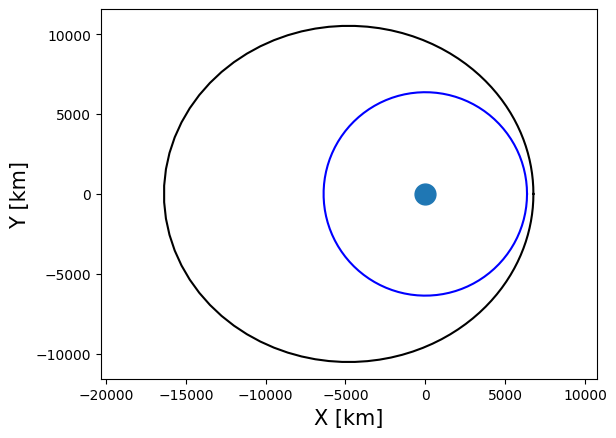

In [11]:
plt.figure()
plt.plot(0.0 , 0.0,'-o', markersize = 15)
plt.plot(x_Earth * 1e-3, y_Earth * 1e-3,'-b', markersize = 15)
plt.plot(x_orbit * 1e-3, y_orbit * 1e-3,'-k')
plt.xlabel(r'X [km]',fontsize=15)
plt.ylabel(r'Y [km]',fontsize=15)
plt.axis('equal')

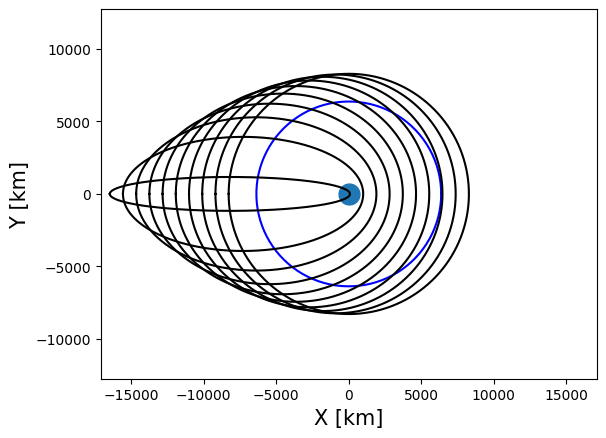

In [15]:
# min and max orbital altitude
a = R * 1.3
e = np.linspace(0, 0.99, 10)

# true anomaly
n_pts = 1000
nu    = np.linspace(-180 * deg2rad, 180 * deg2rad, n_pts)

plt.figure()
plt.plot(0.0 , 0.0,'-o', markersize = 15)
plt.plot(x_Earth * 1e-3, y_Earth * 1e-3,'-b', markersize = 15)
plt.xlabel(r'X [km]',fontsize=15)
plt.ylabel(r'Y [km]',fontsize=15)
plt.axis('equal')
plt.xlim((-2.0*R*1e-3,2.0*R*1e-3))
plt.ylim((-2.0*R*1e-3,2.0*R*1e-3))

for i in range(len(e)):
    p     = a * (1 - e[i]*e[i])            # semilatus rectum
    r     = p / (1 + e[i] * np.cos(nu)) # radius 
    
    # convert to Cartesian system from the polar system
    x_orbit = r * np.cos(nu)         
    y_orbit = r * np.sin(nu)
    
    plt.plot(x_orbit * 1e-3, y_orbit * 1e-3,'-k')